In [24]:
import pandas as pd
import numpy as np
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(open('results.txt','rU'), encoding='utf-8', engine='c',sep='\0',header=None)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [3]:
data[1].fillna('',inplace=True)

In [4]:
# get rid of similar intro
data['processed'] = data[1].apply(lambda x: x.replace('Joining VeloClub not only supports the work we do, there are some fantastic benefits:',
                                    ''))
# Remove punctuation
data['processed'] = data['processed'].map(lambda x: re.sub('''[,“#\.!?”—@…*-:\";‘’\[\]\(\)|]''', '', x))
# 
#  the titles to lowercase
data['processed'] = data['processed'].map(lambda x: x.lower())
# Print out the first rows of papers
data['processed'].head()

0     by matt de neef january   photography by cor ...
1     by cyclingtips  january   photography by grub...
2     by dane cash january   in a video released by...
3     by dane cash january   photography by kristof...
4     by dane cash january   photography by cor vos...
Name: processed, dtype: object

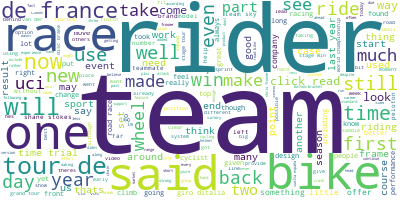

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [6]:
for i,j in enumerate(data[0]):
    print(i,j)

0 January 17, 2020
1 January 17, 2020
2 January 17, 2020
3 January 17, 2020
4 January 15, 2020
5 January 14, 2020
6 January 13, 2020
7 January 13, 2020
8 January 10, 2020
9 January 9, 2020
10 January 9, 2020
11 January 9, 2020
12 January 8, 2020
13 January 6, 2020
14 January 5, 2020
15 January 4, 2020
16 December 27, 2019
17 December 27, 2019
18 December 24, 2019
19 December 23, 2019
20 December 18, 2019
21 December 18, 2019
22 December 18, 2019
23 December 17, 2019
24 December 12, 2019
25 December 12, 2019
26 December 11, 2019
27 December 11, 2019
28 December 8, 2019
29 December 6, 2019
30 December 6, 2019
31 December 6, 2019
32 December 3, 2019
33 December 2, 2019
34 December 2, 2019
35 December 2, 2019
36 November 27, 2019
37 November 27, 2019
38 November 27, 2019
39 November 26, 2019
40 November 21, 2019
41 November 21, 2019
42 November 20, 2019
43 November 20, 2019
44 November 14, 2019
45 November 13, 2019
46 November 13, 2019
47 November 13, 2019
48 November 7, 2019
49 November 7

1277 March 23, 2015
1278 March 23, 2015
1279 March 21, 2015
1280 March 19, 2015
1281 March 19, 2015
1282 March 19, 2015
1283 March 18, 2015
1284 March 16, 2015
1285 March 16, 2015
1286 March 15, 2015
1287 March 15, 2015
1288 March 13, 2015
1289 March 12, 2015
1290 March 11, 2015
1291 March 10, 2015
1292 March 10, 2015
1293 March 10, 2015
1294 March 10, 2015
1295 March 6, 2015
1296 March 5, 2015
1297 March 5, 2015
1298 March 4, 2015
1299 March 3, 2015
1300 March 2, 2015
1301 March 1, 2015
1302 March 1, 2015
1303 February 27, 2015
1304 February 27, 2015
1305 February 27, 2015
1306 February 27, 2015
1307 February 25, 2015
1308 February 25, 2015
1309 February 25, 2015
1310 February 25, 2015
1311 February 21, 2015
1312 February 21, 2015
1313 February 21, 2015
1314 February 21, 2015
1315 February 18, 2015
1316 February 18, 2015
1317 February 18, 2015
1318 February 17, 2015
1319 February 13, 2015
1320 February 13, 2015
1321 February 13, 2015
1322 February 12, 2015
1323 February 10, 2015
1324 

2309  No rear skewer supplied with the Hammer
2310  Cadence measurement requires additional sensor
2311  Magnus requires extra effort for mounting the bike
2312  Tyre width and pressure can affect the accuracy of the Magnus       CTech Rating  7.3           Form   8.0     Function   7.0     Marketing claims   7.0     Serviceability   8.0     Appeal   7.0      What do each of the individual ratings criteria mean? And how did we arrive at the final score? Click here to find out.                              (function ($, window, document, undefined) {                  // if ($(window).width() >= 980) {                 //     var adUnit = ' <div class=\x22ctips-ad-unit \x22 style=\x22overflow-x:hidden; text-align: center;\x22> <div style=\x22display:inline-block;\x22> <script type=\x27text/javascript\x27> googletag.cmd.push(function () { googletag.defineSlot(\x27/109958727/ROS_LargeMPU_01_300x600\x27, [300, 600], \x27div-gpt-ad-div-gpt-ad-1539910217050-0-0\x27).addService(googletag.pubads

In [7]:
data[0] = data[0].apply(lambda x: "here is an error" if type(x) == float else x)
data[0] = data[0].apply(lambda x: x if re.match(r"[A-Za-z]+ [0-9]+, [0-9]+", x) != None else 'OUT')

In [8]:
data_clean = data[data[0] != "OUT"]
data_clean['time'] = pd.to_datetime(data_clean[0], format="%B %d, %Y")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:

data_clean['year'] = data_clean.time.dt.year
data_clean['month'] = data_clean.time.dt.month

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
data_clean = data_clean.drop(1,axis=1)

In [80]:
data_clean.to_csv('clean_cyclingtips.csv')

In [11]:
data_clean

,0,processed,time,year,month
0,"January 17, 2020",by matt de neef january photography by cor ...,2020-01-17,2020,1
1,"January 17, 2020",by cyclingtips january photography by grub...,2020-01-17,2020,1
2,"January 17, 2020",by dane cash january in a video released by...,2020-01-17,2020,1
3,"January 17, 2020",by dane cash january photography by kristof...,2020-01-17,2020,1
4,"January 15, 2020",by dane cash january photography by cor vos...,2020-01-15,2020,1
...,...,...,...,...,...
2612,"March 30, 2010",by cyclingtips march theres never been a r...,2010-03-30,2010,3
2613,"March 15, 2010",by cyclingtips march its great to be back ...,2010-03-15,2010,3
2614,"March 9, 2010",by cyclingtips march weve made it we rol...,2010-03-09,2010,3
2615,"February 27, 2010",by cyclingtips february hue to danang wit...,2010-02-27,2010,2


In [13]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


YEAR = 2009


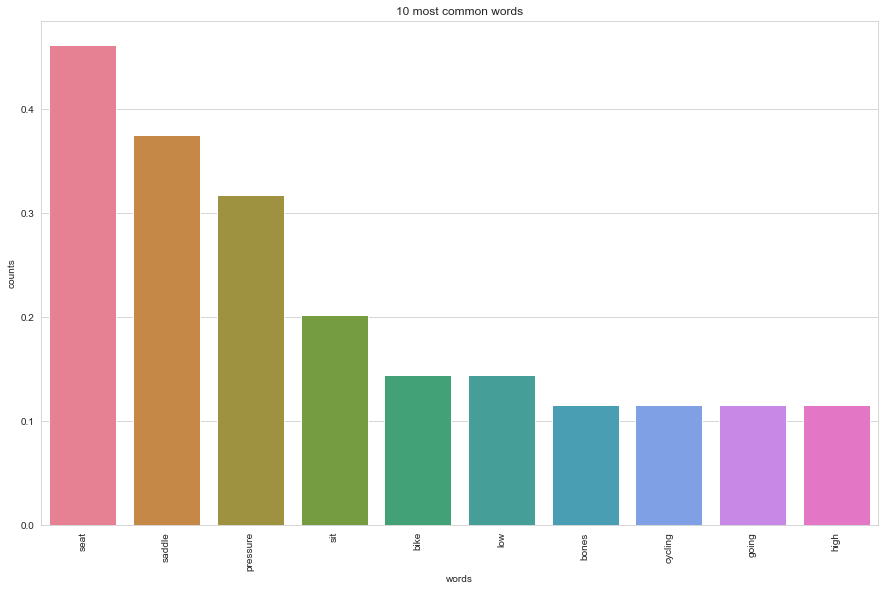

YEAR = 2010


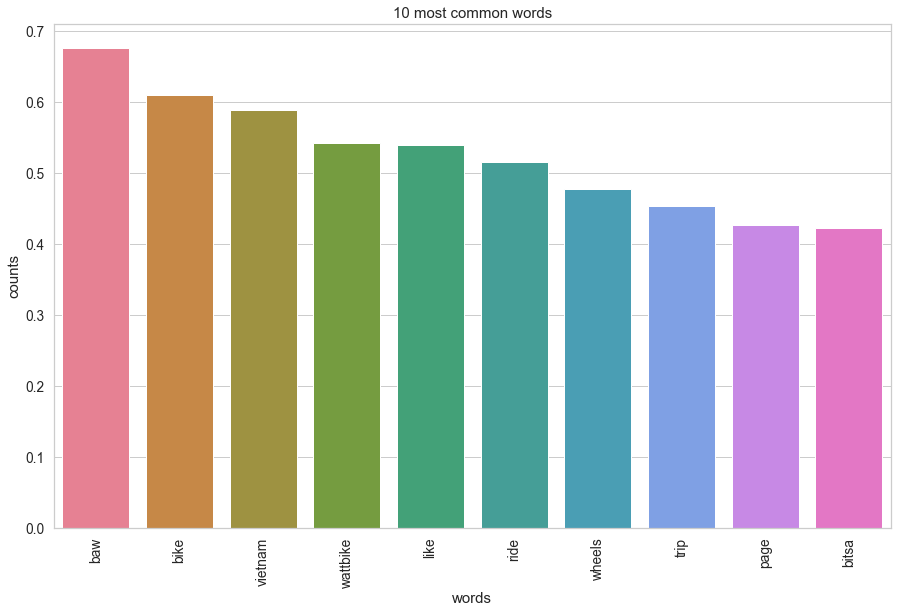

YEAR = 2011


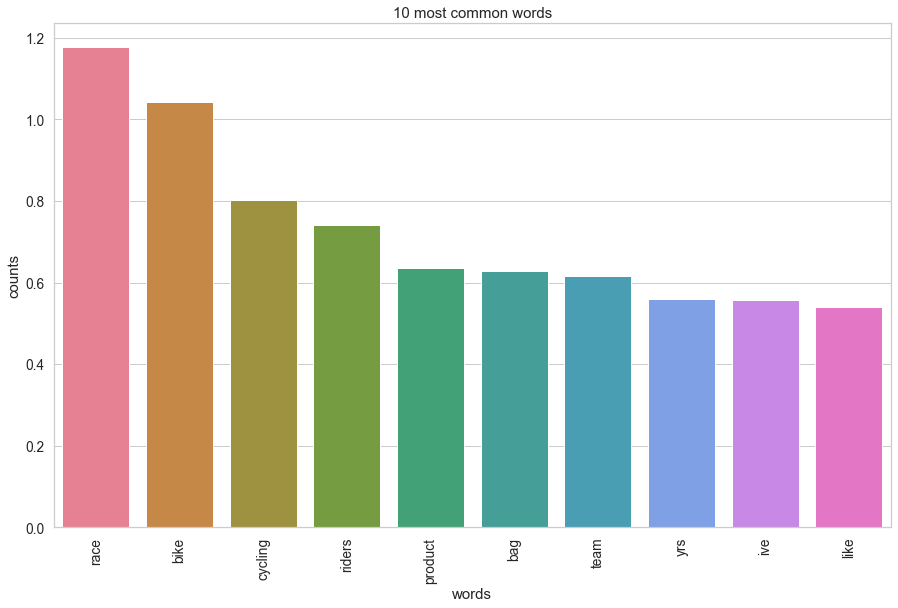

YEAR = 2012


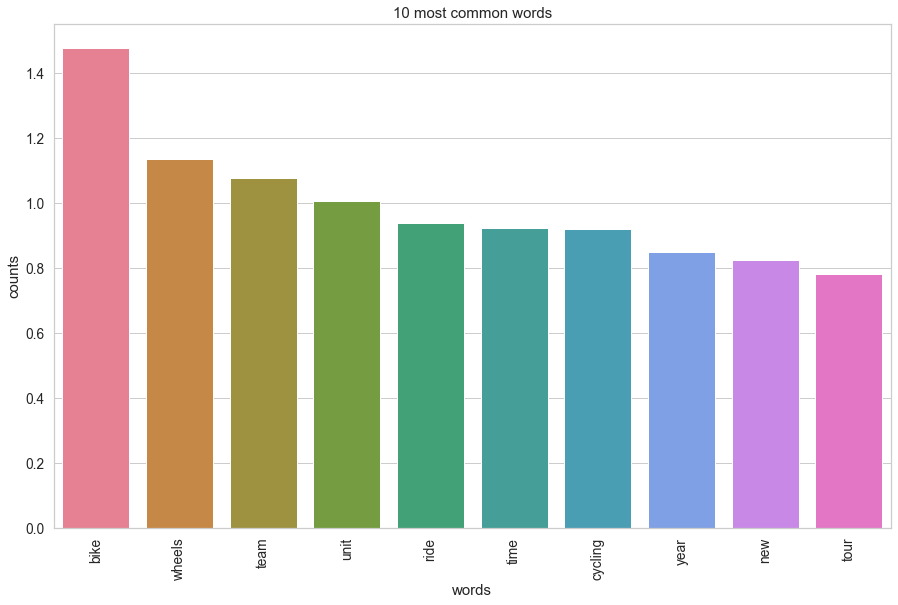

YEAR = 2013


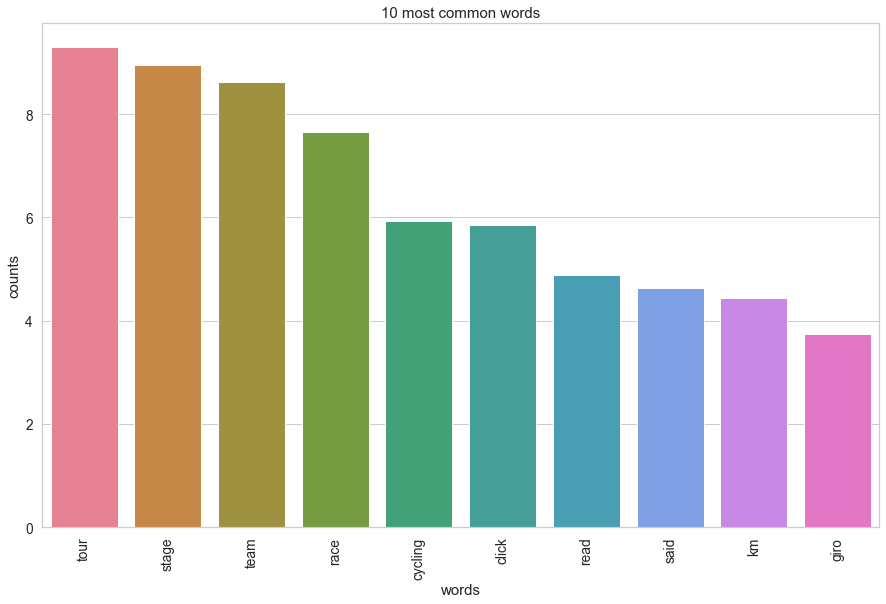

YEAR = 2014


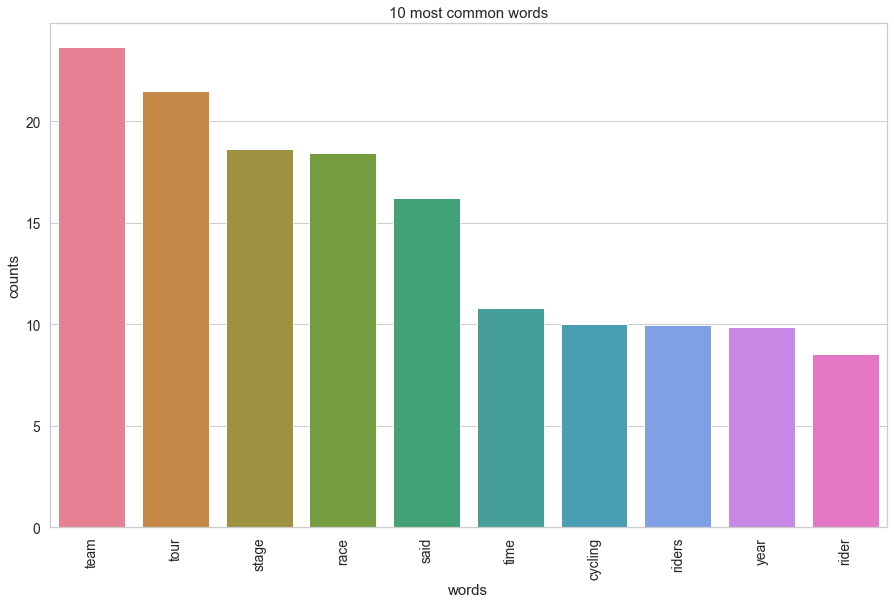

YEAR = 2015


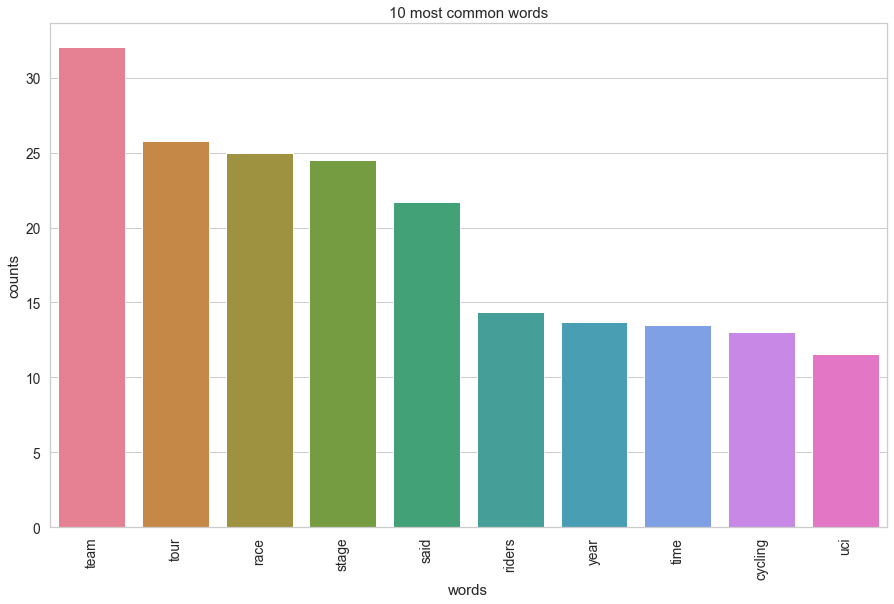

YEAR = 2016


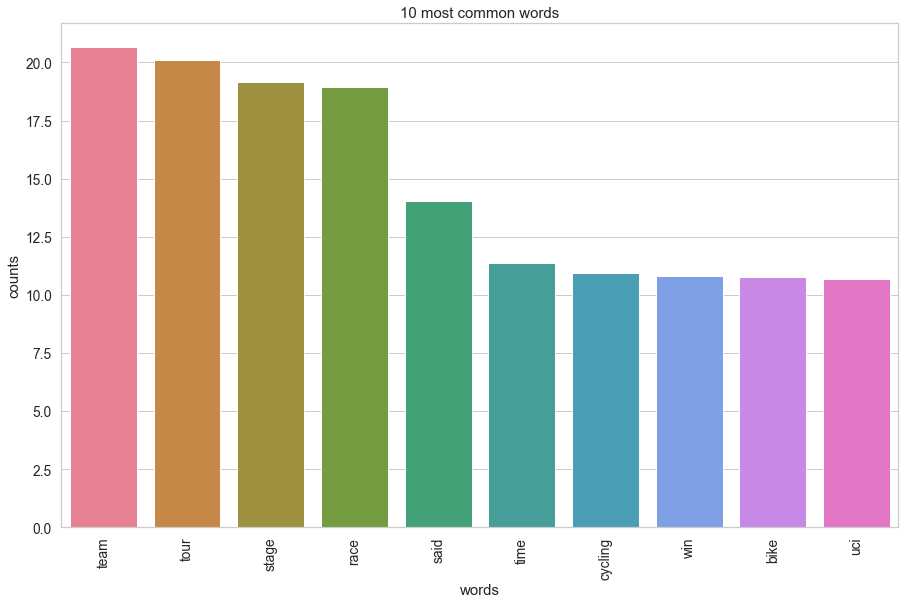

YEAR = 2017


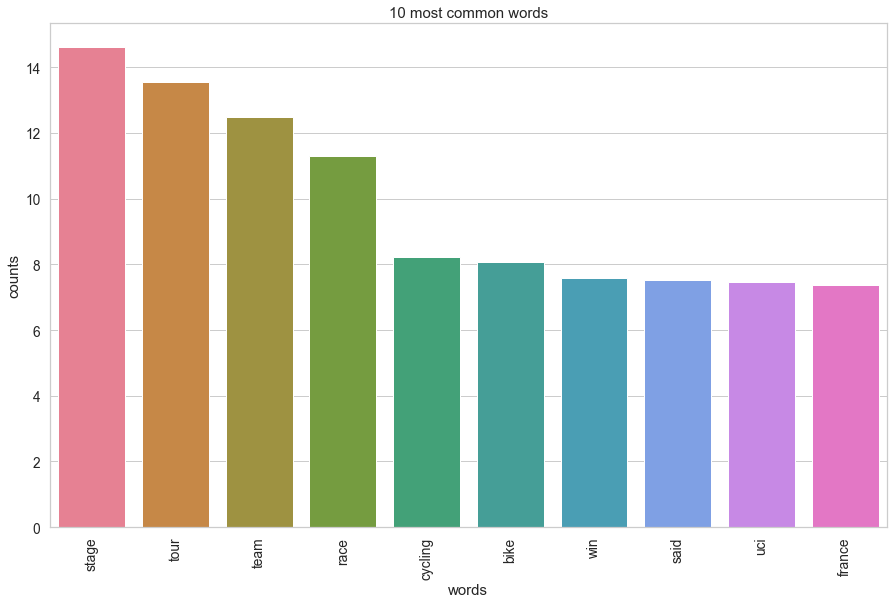

YEAR = 2018


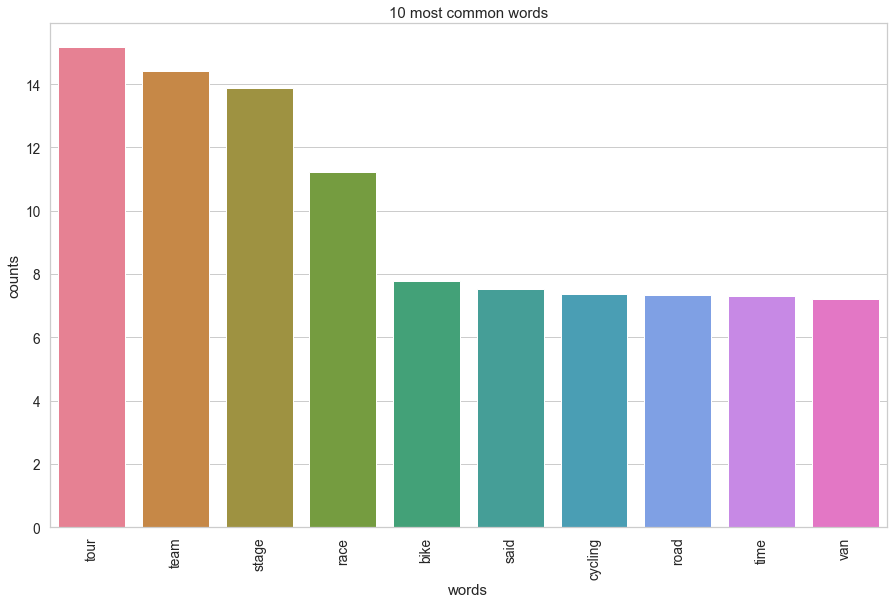

YEAR = 2019


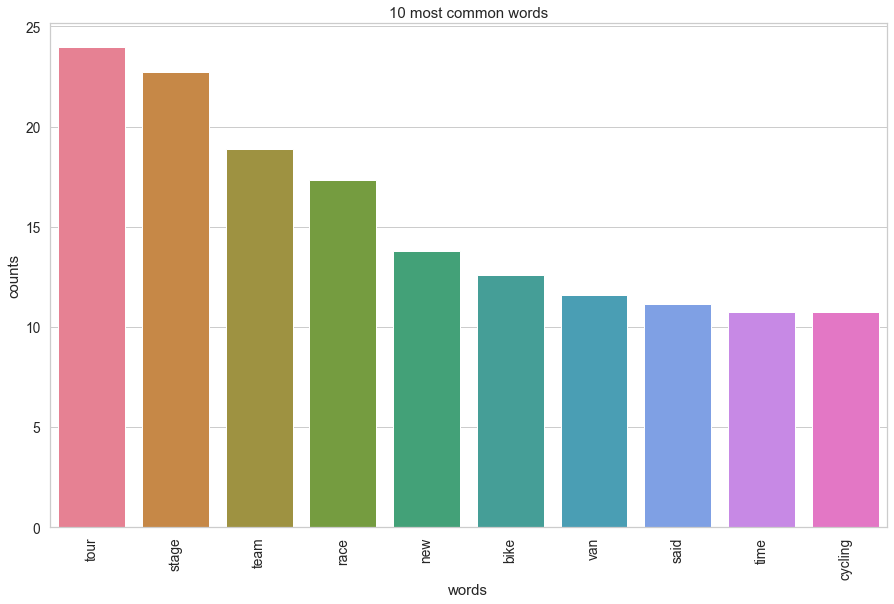

YEAR = 2020


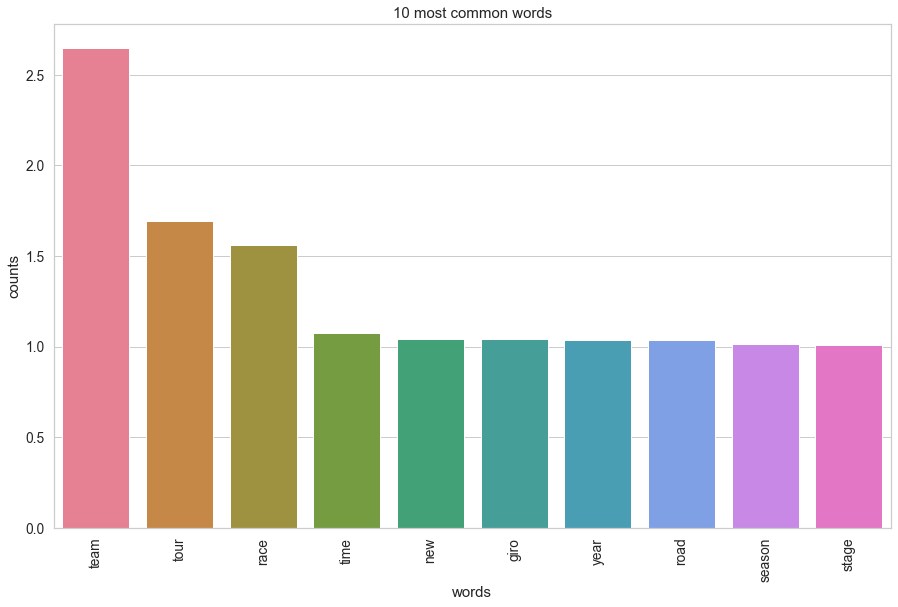

In [14]:
for i in sorted(set(data_clean.year)):
    temp_data = data_clean.processed[data_clean.year == i]
    # Initialise the count vectorizer with the English stop words
    # Fit and transform the processed titles
    count_vectorizer = TfidfVectorizer(stop_words='english')
    count_data = count_vectorizer.fit_transform(temp_data)
    print(f"YEAR = {i}")
    plot_10_most_common_words(count_data,count_vectorizer)

plt.show()
    

In [13]:
data_clean = data_clean.set_index('time')

In [126]:
test = data_clean[(data_clean.year == 2020) & (data_clean.month == 1)]
train = data_clean[(data_clean.year == 2019) & (data_clean.month == 12)]

In [127]:
count_vectorizer = TfidfVectorizer(stop_words='english').fit(train.processed)
count_data = count_vectorizer.transform(train.processed)
test_data = count_vectorizer.transform(test.processed)

In [128]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 4
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
neff shoes auscycling world pearl izumi board gravel shoe xalp

Topic #1:
team bike km bag chain case israel driving phone auscycling

Topic #2:
tour race stage yates year domane giro team riders cycling

Topic #3:
wilier crusher anhalt bike new pro astana ive life team


In [132]:
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(test_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
grip discount formula aerodynamics underneath singlelayer costs temporary replace primarily

Topic #1:
team tour race womens van january win season stage ineos

Topic #2:
underneath costs formula discount aerodynamics singlelayer temporary rubber foam notes

Topic #3:
underneath costs formula discount aerodynamics singlelayer temporary rubber foam notes


In [129]:
test_lda = lda.transform(test_data)
train_lda = lda.transform(count_data)

In [130]:
x=np.dot(test_lda,lda.components_)

In [131]:
# XtX * LDA take arg max
np.linalg.norm(np.dot(test_lda.T,x) / np.linalg.norm(np.dot(test_lda.T,x)),axis=1)

array([0.03106792, 0.93744227, 0.34379979, 0.04514944])

In [134]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
pyLDAvis.enable_notebook()

# LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
sklearn_lda.prepare(lda, test_data, count_vectorizer)
# with open(LDAvis_data_filepath, 'w') as f:
#         pickle.dump(LDAvis_prepared, f)
        
# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath) as f:
#     LDAvis_prepared = pickle.load(f)

# pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.012235 -0.0       1        1  93.709919
0     -0.004078 -0.0       2        1   2.096694
3     -0.004078 -0.0       3        1   2.096694
2     -0.004078 -0.0       4        1   2.096694, topic_info=     Category      Freq             Term     Total  loglift  logprob
4750  Default  0.000000           sprint  0.000000  30.0000  30.0000
3668  Default  0.000000            plans  0.000000  29.0000  29.0000
4008  Default  0.000000           really  0.000000  28.0000  28.0000
3167  Default  0.000000  mitcheltonscott  0.000000  27.0000  27.0000
1562  Default  0.000000             egan  0.000000  26.0000  26.0000
...       ...       ...              ...       ...      ...      ...
1217   Topic4  0.001159           damage  0.059392  -0.0715  -8.6612
3794   Topic4  0.001159       previously  0.063226  -0.1340  -8.6612
4057   Topic4  0.001159          reforms  0.063226  -0.1340  -8.6612
3284   Topic4  0.001159             neri  0.063226  -0.1340  -8.6612
336    Topic4  0.001159        automatic  0.061404  -0.1048  -8.6612

[240 rows x 6 columns], token_table=      Topic     Freq  Term
term                      
5020      1  1.59048  team, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])